# Problem 1: Predicting the quality of wines

Predicting the quality of a wine by tasting is considered a very difficult task. Apparently, even professional wine tasters have an accuracy of only $71/%$. In this problem, we will try to predict the quality of wine using knn regression and see if we can do better than professional wine tasters!

The dataset contains several parameters that describe the wine. The outcome variable is wine quality on a scale of $1$ to $10$. The goal is to predict the quality of wine using the avaiable features. 

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data):
- quality (score between 0 and 10)


You can follow the same steps that we did in class for the California Housing dataset. Here are the steps:


#### Step 0. Import the required libraries and functions

In [ ]:
# numpy, pandas, matplotlib, seaborn, Kfold, cross_val_score, KneighborsRegressor, StandardScaler.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np

#### Step 1. Load the data and explore the dataset. You can also create a histograms of all the variables. Notice the histogram of wine quality. 

In [74]:
dat = pd.read_csv("winequality-red.csv")

In [38]:
round(dat.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


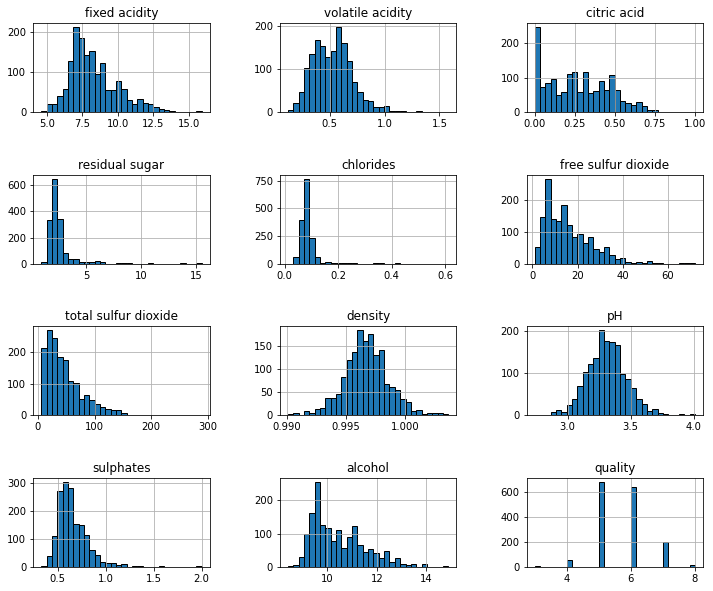

In [32]:
dat.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

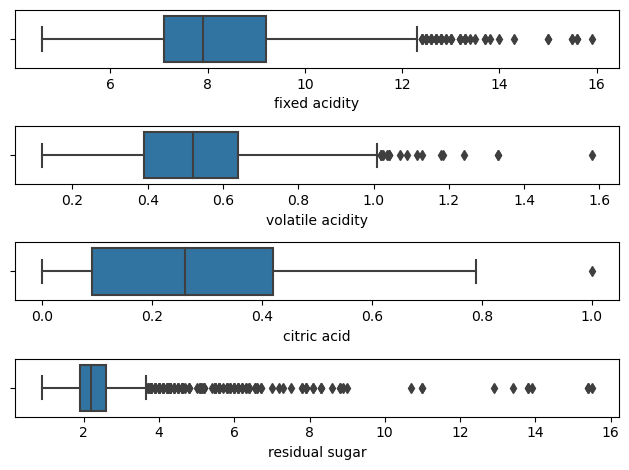

In [18]:
# Boxplots for some of the features

features_for_boxplot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']   


# Creating subplot axes
fig, axes = plt.subplots(4,1)


# Iterating through axes and names
for name, ax in zip(features_for_boxplot, axes.flatten()):
    sns.boxplot(x=dat[name], ax=ax) # ax=ax m
    plt.tight_layout()

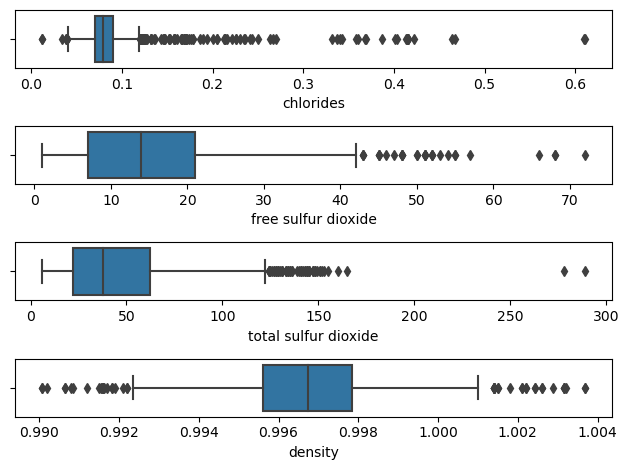

In [19]:
# Boxplots for some of the features

features_for_boxplot = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']


# Creating subplot axes
fig, axes = plt.subplots(4,1)


# Iterating through axes and names
for name, ax in zip(features_for_boxplot, axes.flatten()):
    sns.boxplot(x=dat[name], ax=ax) # ax=ax m
    plt.tight_layout()

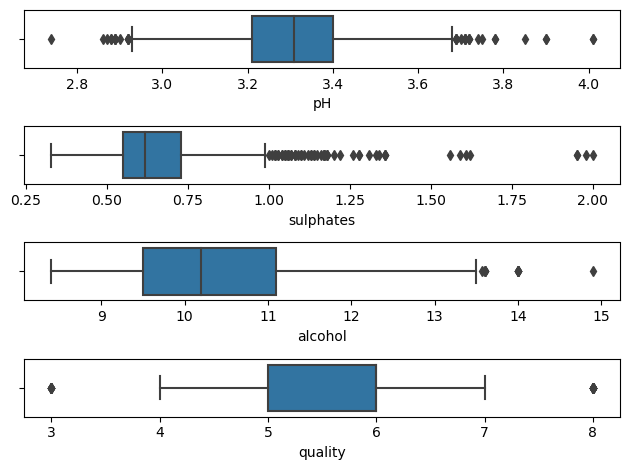

In [20]:
# Boxplots for some of the features

features_for_boxplot = ['pH', 'sulphates', 'alcohol', 'quality']

# Creating subplot axes
fig, axes = plt.subplots(4,1)


# Iterating through axes and names
for name, ax in zip(features_for_boxplot, axes.flatten()):
    sns.boxplot(x=dat[name], ax=ax)
    plt.tight_layout()

#### Step 2. Find the most correlated features with the wine quality

In [22]:
df_corr = dat.corr()
round(df_corr,2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [24]:
#### The features that are most correlated with wine quality are: alcohol, volatile acidity, sulphates, and citric acid
round(abs(df_corr[['quality']]).sort_values(by = 'quality', ascending = False),2)

,quality
quality,1.00
alcohol,0.48
volatile acidity,0.39
sulphates,0.25
citric acid,0.23
total sulfur dioxide,0.19
density,0.17
chlorides,0.13
fixed acidity,0.12
pH,0.06


#### Step 3. Create X and y vectors. Scale the features by using the standard scalar. To do so, you need to create a scaler object and use the function *fit_transform*, and apply it on the array of features. Here's an example on how to do this:

In [ ]:
# define standard scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

In [29]:
dat_scaled = dat.copy()
for feature in dat_scaled.columns:
    dat_scaled[feature] = scaler.fit_transform(dat[[feature]])

round(dat_scaled.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-2.28,-1.39,-1.16,-1.60,-1.42,-1.23,-3.54,-3.70,-1.94,-1.90,-3.27
25%,-0.70,-0.77,-0.93,-0.45,-0.37,-0.85,-0.74,-0.61,-0.66,-0.64,-0.87,-0.79
50%,-0.24,-0.04,-0.06,-0.24,-0.18,-0.18,-0.26,0.00,-0.01,-0.23,-0.21,0.45
75%,0.51,0.63,0.77,0.04,0.05,0.49,0.47,0.58,0.58,0.42,0.64,0.45
max,4.36,5.88,3.74,9.20,11.13,5.37,7.38,3.68,4.53,7.92,4.20,2.93


#### Step 4. Choose the best $k$ by using cross validation. Make sure to use the same cross validation splits for each evaluation of $k$ using the KFold function. Also, use the scaled features that you created in Step 3

In [40]:
X = dat_scaled[['alcohol','volatile acidity','sulphates', 'citric acid']]

y = dat_scaled[['quality']]

In [41]:
Rsquared = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    Rsquared.append(scores.mean()) 

In [71]:
print("Best k for model is ",range(1,51)[np.argmax(Rsquared)])

Best k for model is  9


### What is the $R^2$ for the best model? Do you think this machine learning model can replace professional wine tasters?

In [43]:
max(Rsquared)

0.29859664943409914

Professional wine tasters have an accuracy of $71/%$, while the knn model accuracy is far from it so it cannot replace the professional.

### Find the R^2 for a linear regression model using k fold cross validation. Is KNN better than Linear regression?

In [75]:
from sklearn.linear_model import LinearRegression
X = dat[['alcohol','volatile acidity','sulphates', 'citric acid']]

y = dat[['quality']]

linearReg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linearReg_pipeline, X, y, cv=5)
scores.mean()

0.27288754290058204

Yes. Linear regression model was not better at predicting quality based on the R^2 result.

# Problem 2: Feature selection using cross validation

In this problem, we will take a different approach towards feature selection and choosing the best value of $k$. We will be working with the california housing dataset. Recall that in class we used the correlation between median prices and features to pick the most predictive features. Using correlation, we selected the following features:

- MedInc
- HouseAge
- AveRooms
- Latitude
- Longitude

Now we will do a more refined feature selection by using the $R^2$ of knn models with different features. We will fit 3 different model families:
1. knn with varying k, and features = 'Latitude' and 'Longitude'

2. knn with varying k, and features = 'Latitude', 'Longitude', 'MedInc'

3. knn with varying k, and features = 'Latitude', 'Longitude', 'MedInc' and 'HouseAge'
 
I will guide you through the process step by step


In [ ]:
#### Step 0: import the following functions: 
# numpy, pandas,  matplotlib, KFold, cross_val_score, KNeigbhorRegressor, StandardScaler

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np

In [ ]:
#### Step 1: Load the california_housing.txt file

In [54]:
housing = pd.read_csv("california_housing-1.txt")

In [51]:
#### Step 2: create a crossvalidation object using the Kfold function. Use 5 splits.

In [61]:
cvdata = KFold(n_splits=5, random_state=0,shuffle=True)

In [ ]:
#### Step 3: Now we will use the features latitutde and longitude only to predict median house price.
#We will find the best 'k' by using cross validation with features "Latitutde" and "longitude".
#We have to make sure to scale the data by using the standard scaler (Use the function fit_transform() for scaling)
#Here are the steps

## Step 3.1 Create a array of features 'latitude' and 'longitude' and scale them using a standard scaler. 
# You can also transform the y using np.log() function


In [59]:
X = housing[['Latitude','Longitude']]

y = housing[['MedHouseVal']]

# define standard scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(y)

In [ ]:
## Step 3.2 Run a cross validation for k ranging from 1 to 50. Compute the Rsquared for each k and store it in a list.
#Make sure to use the scaled features, and also use the cross validation object created in step 2
 

In [60]:
Rsquared = []
for k in range(1,51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, Y_scaled, cv=cvdata)
    Rsquared.append(scores.mean()) 



In [56]:
# Step 3.3 Plot the values of k vs Rsquared. Find the best RMSE and the corresponding value of k

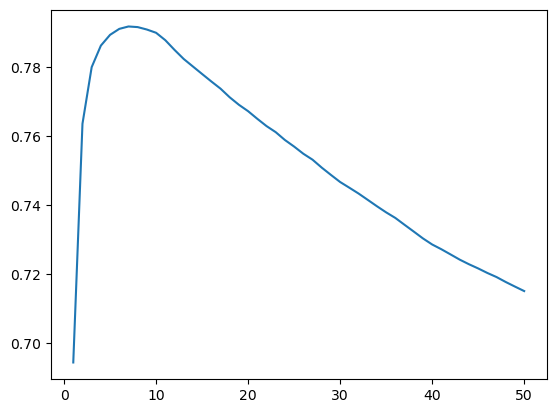

In [62]:
plt.plot(range(1,51),Rsquared)

In [66]:
print("The best RMSE is ",round(max(Rsquared),2),"and the corresponding value of k is ",range(1,51)[np.argmax(Rsquared)])

The best RMSE is  0.79 and the corresponding value of k is  7


In [ ]:
# Step 4: Now repeat all the steps in Step 3,but this time  using the features 'Latitude", 'Longitude', 'MedInc'

The best RMSE is  0.77 and the corresponding value of k is  7


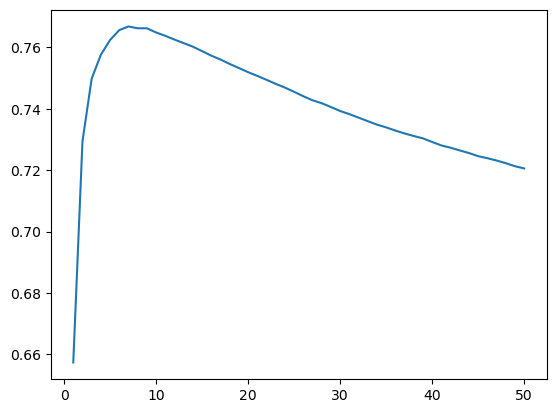

In [68]:
X = housing[['MedInc','Latitude','Longitude']]

y = housing[['MedHouseVal']]

# define standard scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(y)

Rsquared = []
for k in range(1,51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, Y_scaled, cv=cvdata)
    Rsquared.append(scores.mean()) 
    
plt.plot(range(1,51),Rsquared)
print("The best RMSE is ",round(max(Rsquared),2),"and the corresponding value of k is ",range(1,51)[np.argmax(Rsquared)])

In [ ]:
## Step 5  Repeat the previous steps using the features 'latitute', 'longitude', 'MedInc' and 'HouseAge' 
#to find the best $k$ and $R^2$


The best RMSE is  0.698 and the corresponding value of k is  9


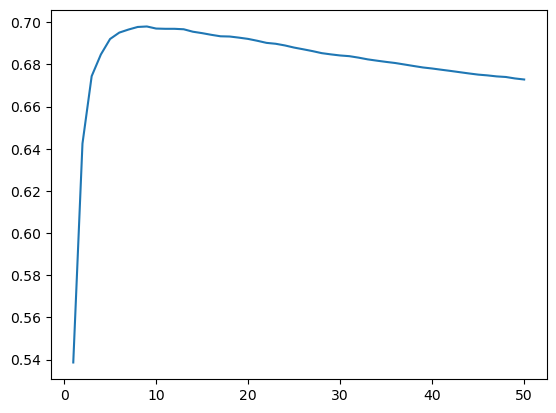

In [70]:
X = housing[['MedInc','HouseAge','Latitude','Longitude']]

y = housing[['MedHouseVal']]

# define standard scaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(y)

Rsquared = []
for k in range(1,51):   
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, Y_scaled, cv=cvdata)
    Rsquared.append(scores.mean()) 
    
plt.plot(range(1,51),Rsquared)
print("The best RMSE is ",round(max(Rsquared),3),"and the corresponding value of k is ",range(1,51)[np.argmax(Rsquared)])

Now you can fill in the following table:

**Best R^2 for Latitude, Longitude : 0.79**

**Best R^2 for latitude, longitude, MedInc : 0.77**

**Best R^2 for latitude, longitude, MedInc, HouseAge : 0.70**

Which model is the best?

**The original model with only latitude and longitude is the best**

What is the lesson learnt from this? Are more features always better? Specially for models like knn?

**No more feature is not always better. Models like knn benefit more from less complex models with less features because we are not spreading observations out too much between the dimensions**

# Problem 3: Nuances of knn

In this problem, we will try to understand some situations where knn does not work very well. There are two main issues:

- Categorical features and the choice of distance 
- The curse of dimensionality - Too many features
 

So far, we have only used knn when we have numeric features. When we have numeric features, we can use the eucledian distance. 

But What if we have categorical features as well? The eucledian distance does not make sense in the case of categorical features (Recall the defintion of eucledian distance from the previous HW).

If we have only categorical features, we can use edit distance, or hamming distance. We will do this in several steps.

First we need to code the categorical features as dummy variables. Here's an example:


In [6]:
cat = pd.read_csv('cat.csv')
cat.head()

,gender,eye_color,hair_color
0,M,brown,black
1,M,blue,brown
2,F,blue,black
3,M,black,black
4,F,blue,brown


We use the get_dummies function to create dummy variables from categorical data

In [7]:
dummy = pd.get_dummies(cat)
dummy.head()

,gender_F,gender_M,eye_color_black,eye_color_blue,eye_color_brown,hair_color_black,hair_color_brown
0,0,1,0,0,1,1,0
1,0,1,0,1,0,0,1
2,1,0,0,1,0,1,0
3,0,1,1,0,0,1,0
4,1,0,0,1,0,0,1


In [8]:
#Now we can access the first person by using the .loc method
dummy.loc[0]

gender_F            0
gender_M            1
eye_color_black     0
eye_color_blue      0
eye_color_brown     1
hair_color_black    1
hair_color_brown    0
Name: 0, dtype: uint8

In [9]:
dummy.loc[1]

gender_F            0
gender_M            1
eye_color_black     0
eye_color_blue      1
eye_color_brown     0
hair_color_black    0
hair_color_brown    1
Name: 1, dtype: uint8

The hamming distance between two strings is the number of positions in which they differ.

For example, the hamming distance between 110 and 111 is 1. The hamming distance between 100 and 111 is 2.

In [10]:
def hammingDist(str1, str2):
    i = 0
    count = 0
 
    while(i < len(str1)):
        if(str1[i] != str2[i]):
            count += 1
        i += 1
    return count

In [11]:
hammingDist(dummy.loc[0],dummy.loc[1])

4

In [12]:
hammingDist(cat.loc[0],cat.loc[1])

2

In case we only have categorical features, we can use distances such as hamming distance, edit distance and so on. But if we have both numeric and categorical features (called mixed features), then its a bit tricky. Can you think of how to compute the distance in KNN when you have both continuos and categorical fetures?

#your answer here

**We can first calculate hamming distance for the categorical variable then scale all the features. Afterwards, we can apply weight to the distance. For example, give more weight for the Eucleadian distance of the continuous features and less weight the hamming distance to the categorical features**

## The curse of dimensionality 

In Problem 2, we saw that more features in knn does not neccessary mean a better model. 

This phenomena is a limitation of knn. When we have lots of features, knn generally performs poorly. This is called the curse of dimensionality. 

Mathematically, the term `dimension` is used to describe the number of features. For example, if there are 3 features, we are in 3 dimensional space, if we have 100 features, we are in 100 dimensional space. (we can only visualize in 2 or 3 dimensions). As the number of dimensions increase, there are some weird things that happen.

One of the weird things that happens is that in high dimensions `all points are far from each other`. So algorithms like nearest neighbors fail because given a single point, we cannot find any points "close" to it.

This happens because there is more "space" in high dimensions. (There is a lot more to this issue, but I am trying to explain it in the simplest possible manner). The following figure illustrates the idea:

In the figure, you can see, as we move from 1 dimension to 2,3 and 4 dimensions, there is more space and the points become farther and farther.
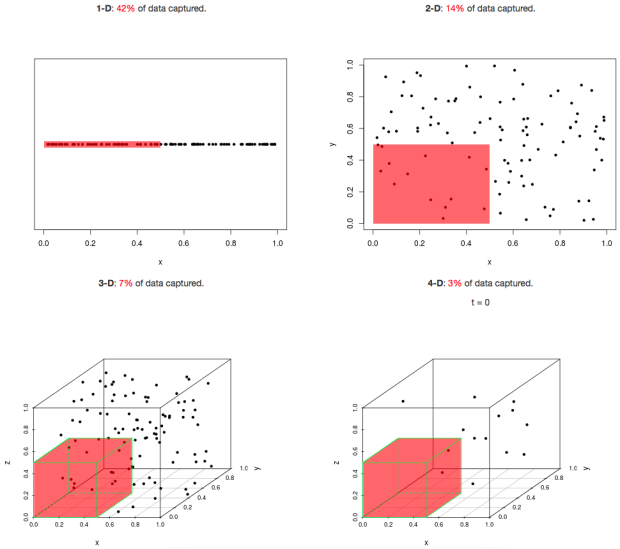